# Miles-Per-Gallon Prediction


In this project, I have used the Auto MPG dataset which I obtained from UCL Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/Auto+MPG).

The dataset has 9 columns including the **mpg** column which is what we have to predict. There are 398 rows in the dataset.

Attributes Information:

1. mpg: continuous
2. cylinders: multi-valued discrete
3. displacement: continuous
4. horsepower: continuous
5. weight: continuous
6. acceleration: continuous
7. model year: multi-valued discrete
8. origin: multi-valued discrete
9. car name: string (unique for each instance)

**mpg** is a continuous variable hence we will be using the a regression model in this project.

## Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Reading the dataset

In [2]:
car = pd.read_csv('car-data.csv')

## Exploring the dataset

In [3]:
car

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,Unnamed: 9,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,18.0,8.0,307.0,130,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,15.0,8.0,350.0,165,3693.0,11.5,70.0,1.0,buick skylark 320,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,18.0,8.0,318.0,150,3436.0,11.0,70.0,1.0,plymouth satellite,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,16.0,8.0,304.0,150,3433.0,12.0,70.0,1.0,amc rebel sst,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,17.0,8.0,302.0,140,3449.0,10.5,70.0,1.0,ford torino,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
761,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ford mustang gl
762,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,vw pickup
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,dodge rampage
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ford ranger


From the above table, we can see that the *csv* file contains additional 14 unwanted columns and some extra rows, hence we will have to remove those columns and rows

In [4]:
car = car.iloc[:398,:9]

In [5]:
car

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8.0,307.0,130,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140,3449.0,10.5,70.0,1.0,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4.0,140.0,86,2790.0,15.6,82.0,1.0,ford mustang gl
394,44.0,4.0,97.0,52,2130.0,24.6,82.0,2.0,vw pickup
395,32.0,4.0,135.0,84,2295.0,11.6,82.0,1.0,dodge rampage
396,28.0,4.0,120.0,79,2625.0,18.6,82.0,1.0,ford ranger


In [6]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    float64
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6    model year   398 non-null    float64
 7   origin        398 non-null    float64
 8   car name      398 non-null    object 
dtypes: float64(7), object(2)
memory usage: 28.1+ KB


In [7]:
car.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


### Checking for null values

In [8]:
car.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
 model year     0
origin          0
car name        0
dtype: int64

<AxesSubplot:>

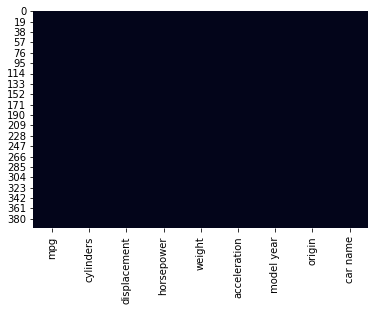

In [9]:
sns.heatmap(car.isnull(),cbar = False)

The above heatmap shows us that there are **ZERO** Null values in the dataset. But we'll look at the data more closely to be sure of the number of **Null values**.

We'll start with **horsepower**. This column should have been a **numeric** column but it's datatype is **object**.

In [10]:
car['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

We can see that there is a **?** in the above array. This represent the **Null Values** in the dataset. So the dataset actually has **Null Values**.

In [11]:
len(car[car['horsepower'] == '?'])

6

We can see that the dataset has **6 Null values**.

In the next section, We will be doing some Exploratory Data Analysis. We will se if we can find some trend in the dataset so that we can use it to deal with the **Null values** in the **horsepower** column.

For the time being, we will replace **?** with **NaN** and convert the **horsepower** column to a numeric column have **float** datatype.

In [12]:
car['horsepower'] = car['horsepower'].replace('?',np.nan)

In [13]:
car['horsepower'] = pd.to_numeric(car['horsepower'], downcast='float',)

In [14]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    float64
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float32
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6    model year   398 non-null    float64
 7   origin        398 non-null    float64
 8   car name      398 non-null    object 
dtypes: float32(1), float64(7), object(1)
memory usage: 26.6+ KB


## Exploratory Data Analysis

Firstly we will se the distribution of each continuous feature.

Text(0.5, 1.0, 'displacement distribution')

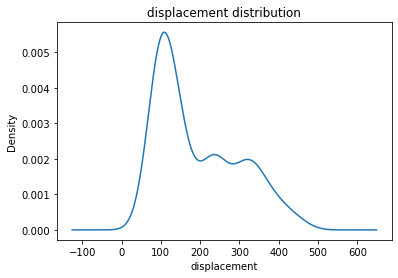

In [15]:
car['displacement'].plot.density()
plt.xlabel('displacement')
plt.title('displacement distribution')

We can see that **displacement** is **randomly distributed**. Hence we would need to do **Log Transformation** to make it **normally distributed**.

Text(0.5, 1.0, 'horsepower distribution')

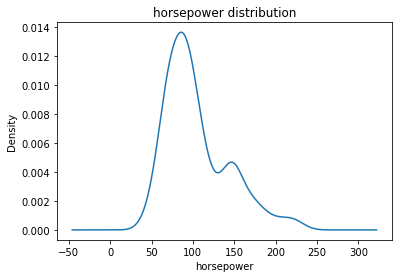

In [16]:
car['horsepower'].plot.density()
plt.xlabel('horsepower')
plt.title('horsepower distribution')

**horsepower** is almost normally distributed. Hence we would need to do **Log Transformation** to make it **normally distributed**.

Text(0.5, 1.0, 'weight distribution ')

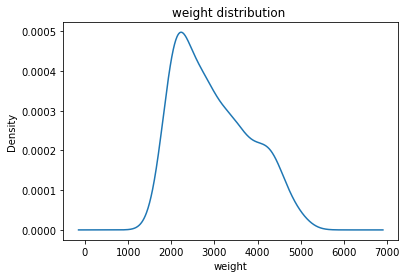

In [17]:
car['weight'].plot.density()
plt.xlabel('weight')
plt.title('weight distribution ')

**weight** is almost normally distributed. Hence we would need to do **Log Transformation** to make it **normally distributed**.

Text(0.5, 1.0, 'accelaration distribution ')

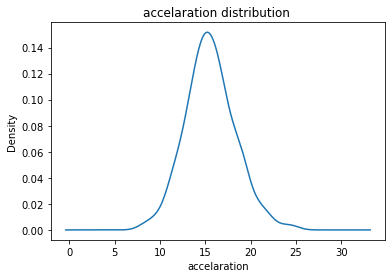

In [18]:
car['acceleration'].plot.density()
plt.xlabel('accelaration')
plt.title('accelaration distribution ')

We can see that **accelaration** is **normally distributed**.

<AxesSubplot:ylabel='Density'>

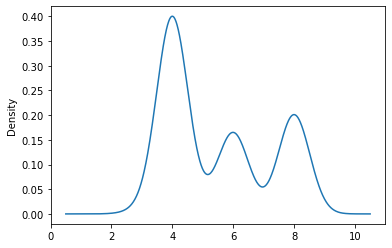

In [19]:
car['cylinders'].plot.density()

<AxesSubplot:ylabel='Density'>

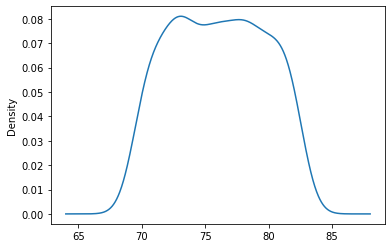

In [20]:
car[' model year'].plot.density()

From the **model year** density plot we can see that most of the cars have been made between 1970 and 1980.

<AxesSubplot:ylabel='Density'>

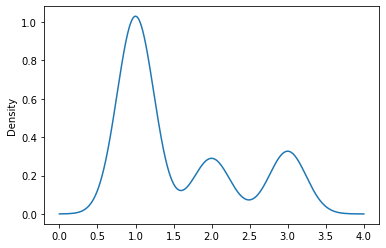

In [21]:
car['origin'].plot.density()

Now we will make plots to see the dependency of **mpg** and other features

<AxesSubplot:xlabel='origin'>

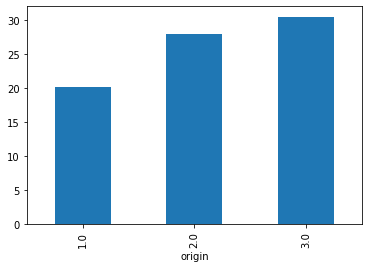

In [22]:
car.groupby(by = 'origin')['mpg'].mean().plot.bar()

We can see that with increase in **origin** the mean **mpg** is also increasing.

<AxesSubplot:xlabel=' model year'>

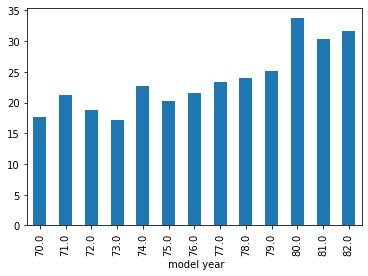

In [23]:
car.groupby(by = ' model year')['mpg'].mean().plot.bar()

We can see that **model** build recently have higher **mpg**.

<AxesSubplot:xlabel='cylinders'>

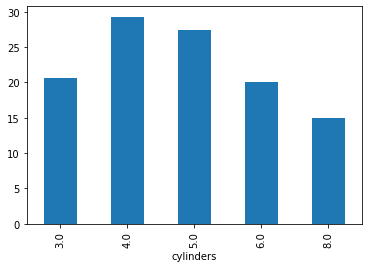

In [24]:
car.groupby(by = 'cylinders')['mpg'].mean().plot.bar()

We can see that with increase in the number of **cylinders**, the mean **mpg** is decreasing.

Text(0.5, 0, 'displacement')

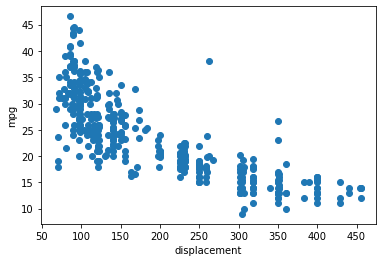

In [25]:
plt.scatter(car['displacement'] , car['mpg'])
plt.ylabel('mpg')
plt.xlabel('displacement')

Here, we can clearly see that **mpg** is decreasing with increase in **displacement**.

Text(0.5, 0, 'horsepower')

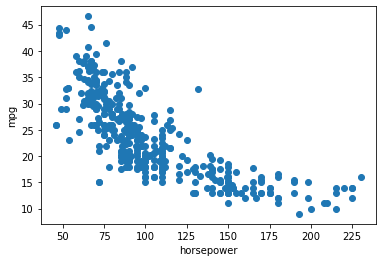

In [26]:
plt.scatter(car['horsepower'] , car['mpg'])
plt.ylabel('mpg')
plt.xlabel('horsepower')

Here, we can clearly see that **mpg** is decreasing with increase in **horsepower**.

Text(0.5, 0, 'weight')

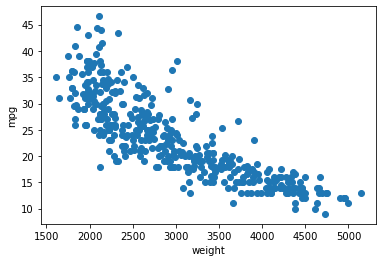

In [27]:
plt.scatter(car['weight'] , car['mpg'])
plt.ylabel('mpg')
plt.xlabel('weight')

Here, we can clearly see that **mpg** is decreasing with increase in **weight**.

Text(0.5, 0, 'acceleration')

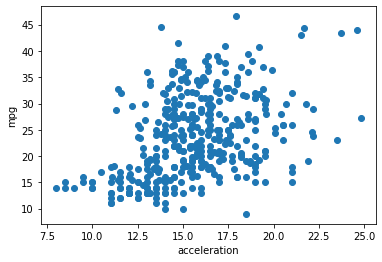

In [28]:
plt.scatter(car['acceleration'] , car['mpg'])
plt.ylabel('mpg')
plt.xlabel('acceleration')

We cannot see any clear trend between **acceleraion** and **mpg** from the above scatter plot.

Now we'll make a **correlation heatmap** using **seaborn** library. 

<AxesSubplot:>

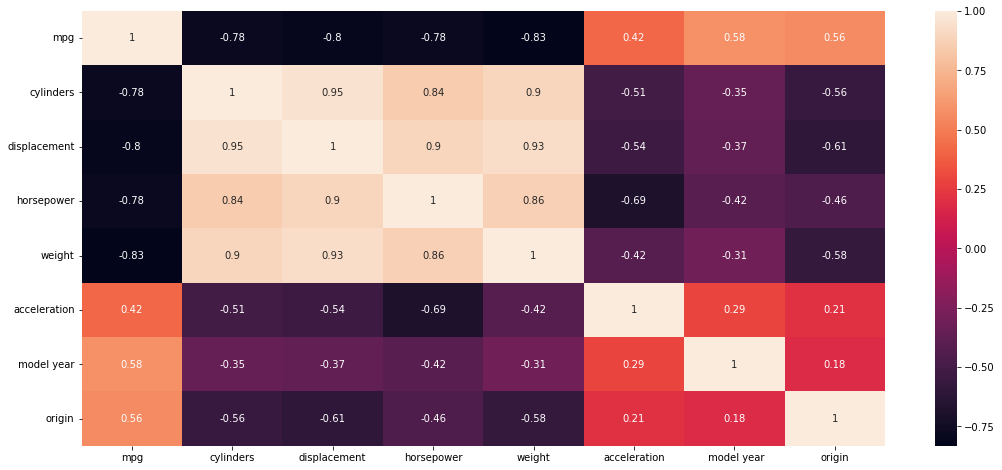

In [29]:
corr = car.corr()
plt.figure(figsize = (18,8))
sns.heatmap(corr, annot = True)

In [30]:
# Cylinders,displacement and weight columns are highly correlated so we will remove two of them i.e. cylinders and displacement.

From the above heatmap , we can conclude that:

1) Cylinders , displacement and weight columns are highly correlated with each other.


2) Horsepower is highly correlated with displacement.

## Data Preprocessing

From the above section, we can see that we have to do Log Transformation on some features to make them normally distributed and after looking at the correlation heatmap, we will drop **cylinders** and **weight** and **horsepower**.

We will also drop **car name** as the name of the car has no impact on **mph**.

We will keep **displacement** as it is highly correlated with **mpg**.

Dropping **horsepower** will also take care of the **Null Values**.

In [31]:
car.drop(['cylinders','horsepower','weight','car name'],axis = 1,inplace = True)

In [32]:
car

,mpg,displacement,acceleration,model year,origin
0,18.0,307.0,12.0,70.0,1.0
1,15.0,350.0,11.5,70.0,1.0
2,18.0,318.0,11.0,70.0,1.0
3,16.0,304.0,12.0,70.0,1.0
4,17.0,302.0,10.5,70.0,1.0
...,...,...,...,...,...
393,27.0,140.0,15.6,82.0,1.0
394,44.0,97.0,24.6,82.0,2.0
395,32.0,135.0,11.6,82.0,1.0
396,28.0,120.0,18.6,82.0,1.0


Now we will split the dataset into **X** and **Y** which represents the **features** and **label** respectively.

In [33]:
X = car.drop('mpg',axis = 1)
Y = car['mpg']

Now we have two columns **model year**  and **origin** which are **discrete valued feature**. From **Exploratory Data Analysis** section, we saw that with increase in both **model year** and **origin**, **mpg** was also increasing, hence we will use **LabelEncoder()** of the **sklearn** library to deal with these **discrete valued features**.

In [34]:
from sklearn.preprocessing import LabelEncoder
encoder_1 = LabelEncoder()
encoder_2 = LabelEncoder()
X[' model year'] = encoder_1.fit_transform(X[' model year'])
X['origin'] = encoder_2.fit_transform(X['origin'])

In [35]:
X

,displacement,acceleration,model year,origin
0,307.0,12.0,0,0
1,350.0,11.5,0,0
2,318.0,11.0,0,0
3,304.0,12.0,0,0
4,302.0,10.5,0,0
...,...,...,...,...
393,140.0,15.6,12,0
394,97.0,24.6,12,1
395,135.0,11.6,12,0
396,120.0,18.6,12,0


We saw in the **Exploratory Data Anslysis** section that **acceleration** was normally distributed but **displacement** columns was **skewed**, hence we will use the **Log Transformation** technique on the **displacement** column to make it **normally distributed**.

For this, We will use the **.log** method of the **numpy** library which will return us the **Log Transformed** column.

In [36]:
# We have added 1 in the .log method so that if the log function encounters zero, it will not give an error.
X['displacement'] = np.log(X['displacement'] + 1)  

## Splitting the dataset into training and test set.

In [37]:
from sklearn.model_selection import train_test_split
X_train , X_test, Y_train , Y_test = train_test_split(X,Y,test_size = 0.2)

## Feature Scaling

We will now scale the feature datasets using **StandardScaler** technique.

Here for each feature, the values will be scaled such that the mean of the resultant feature will be zero with unit variance i.e.
for each feature, each value will be scaled using the formula:
                      `z = (x-u)/s`   , where **x** is a particular value of a feature, **u** is the **mean** of the feature and **s** is the **standard deviation**.

In [38]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training A Random Forest Regressor

In [41]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=35)
regressor.fit(X_train,Y_train)

RandomForestRegressor(n_estimators=35)

## Using the trained model on test set

In [42]:
y_pred = regressor.predict(X_test)

## Evaluating the predictions

For evaluation, we will use the **root mean squared error**. As **sklearn** library only provides with **mean squared error**, so we will use it and then use the **.sqrt** function of the **numpy** library to calculate the **root mean squared error**.

In [43]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test,y_pred)
print(np.sqrt(mse))

3.6874456450892303


We obtained the **RMSE** = **3.6874456450892303**

## Conclusion

This concludes this project. Here we used the Auto MPG dataset from the UCL Machine Learning Repository.

We did **Exploratory Data Analysis** on the dataset to obtain information from all the columns.

We then used the **Correlation Martix** to filter our **useful** columns.

We build a **Random Forest Regressor** model for the prediction of **mpg** and obtained **Root Mean Squared Error** = **3.6874456450892303**.

